# UMAP Analysis of Synthetic Cell Measurements

In this notebook, we will create a synthetic dataset of cell measurements using various parameters. We will then perform UMAP (Uniform Manifold Approximation and Projection) on the dataset and visualize the results using seaborn.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Generate Synthetic Data

We will create a synthetic dataset of 100 cells with the following parameters:
- Intensity
- Aspect Ratio
- Perimeter
- Elongation

In [2]:
np.random.seed(0)
n_samples = 100

data = pd.DataFrame({
    'intensity': np.random.uniform(100, 200, n_samples),
    'aspect_ratio': np.random.uniform(1.0, 3.0, n_samples),
    'perimeter': np.random.uniform(30, 80, n_samples),
    'elongation': np.random.uniform(0.5, 2.0, n_samples)
})

data.head()

,intensity,aspect_ratio,perimeter,elongation
0,154.881350,2.355633,45.589794,1.859833
1,171.518937,1.540016,64.817174,1.661071
2,160.276338,2.470388,48.887592,0.999718
3,154.488318,2.924377,38.980184,0.621652
4,142.365480,1.497506,31.233936,1.110862


## Standardize Data

Standardizing the data before applying UMAP to ensure each feature contributes equally.

In [3]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


## Apply UMAP

We will reduce the dimensionality of the dataset to 2 using UMAP.

In [4]:
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_embedding = umap_model.fit_transform(data_scaled)


/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


## Add UMAP Results Back to DataFrame

In [5]:
data['UMAP1'] = umap_embedding[:, 0]
data['UMAP2'] = umap_embedding[:, 1]

data.head()

,intensity,aspect_ratio,perimeter,elongation,UMAP1,UMAP2
0,154.881350,2.355633,45.589794,1.859833,9.783914,5.800027
1,171.518937,1.540016,64.817174,1.661071,7.947526,5.991787
2,160.276338,2.470388,48.887592,0.999718,7.244709,4.396786
3,154.488318,2.924377,38.980184,0.621652,7.102713,3.692922
4,142.365480,1.497506,31.233936,1.110862,8.704943,3.532920


## Visualize UMAP Results

We will use seaborn to create a scatter plot of the UMAP results.

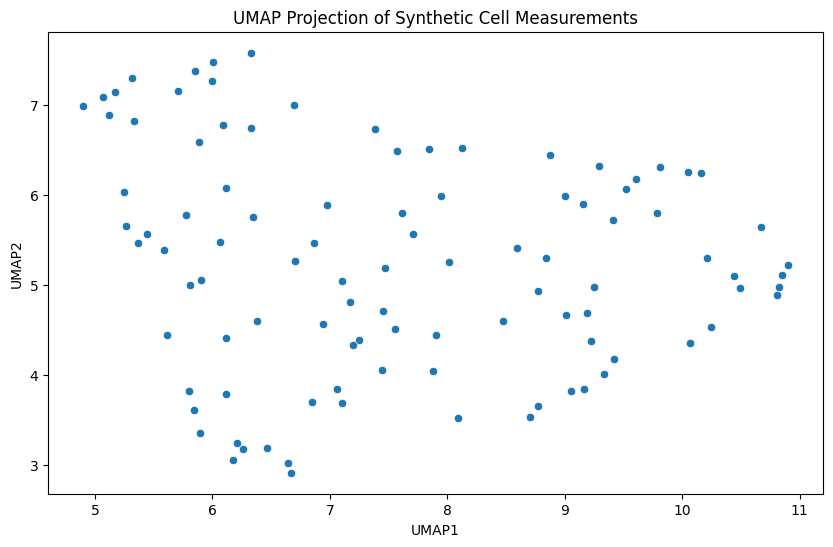

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', data=data)
plt.title('UMAP Projection of Synthetic Cell Measurements')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.savefig('umap_projection.png')
plt.show()